# Multi-Task CNN on Fashion-MNIST

In [ ]:
# imports
from fashion_mnist_train import train_and_validate
import torch 
from fashion_mnist_model import MultiTaskFashionCNN , visualize_feature_maps
from fashion_mnist_dataset import load_fashion_data

/home2/shubhamcvit/.local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
# # Define the set of runs to execute
# hyperparameter_runs = [
#     # Run 1: Baseline (Equal Weighting)
#     {
#         'run_name': 'Baseline_L1L1_Adam_LR001',
#         'learning_rate': 1e-3, 'dropout_rate': 0.25, 'optimizer': 'Adam',
#         'lambda1': 1.0, 'lambda2': 1.0, 'batch_size': 128, 'epochs': 10
#     },
#     # Run 2: High Classification Weight (L1 > L2)
#     {
#         'run_name': 'ClsHeavy_L2L1_SGD_LR01',
#         'learning_rate': 1e-2, 'dropout_rate': 0.5, 'optimizer': 'SGD',
#         'lambda1': 2.0, 'lambda2': 1.0, 'batch_size': 64, 'epochs': 10
#     },
#     # Run 3: High Regression Weight (L2 > L1)
#     {
#         'run_name': 'RegHeavy_L1L2_Adam_LR001',
#         'learning_rate': 1e-3, 'dropout_rate': 0.25, 'optimizer': 'Adam',
#         'lambda1': 1.0, 'lambda2': 2.0, 'batch_size': 128, 'epochs': 10
#     },
#     # Run 4: Low Regression Weight (L2 small)
#     {
#         'run_name': 'RegLight_L1L01_AdamW_LR0005',
#         'learning_rate': 5e-4, 'dropout_rate': 0.1, 'optimizer': 'AdamW',
#         'lambda1': 1.0, 'lambda2': 0.1, 'batch_size': 256, 'epochs': 10
#     },
#     # Run 5: Low Classification Weight (L1 small)
#     {
#         'run_name': 'ClsLight_L05L1_Adam_LR001',
#         'learning_rate': 1e-3, 'dropout_rate': 0.25, 'optimizer': 'Adam',
#         'lambda1': 0.5, 'lambda2': 1.0, 'batch_size': 128, 'epochs': 10
#     }
# ]

In [ ]:
# Define the set of runs to execute
hyperparameter_runs = [
    # Run 1: Baseline (Equal Loss Weighting)
    {
        'run_name': 'L1_1.0_L2_1.0',
        'learning_rate': 1e-3, 'dropout_rate': 0.25, 'optimizer': 'Adam',
        'lambda1': 1.0, 'lambda2': 1.0, 'batch_size': 128, 'epochs': 10
    },
    # Run 2: Higher Classification Weight
    {
        'run_name': 'L1_2.0_L2_1.0',
        'learning_rate': 1e-3, 'dropout_rate': 0.25, 'optimizer': 'Adam',
        'lambda1': 2.0, 'lambda2': 1.0, 'batch_size': 128, 'epochs': 10
    },
    # Run 3: Higher Regression Weight
    {
        'run_name': 'L1_1.0_L2_2.0',
        'learning_rate': 1e-3, 'dropout_rate': 0.25, 'optimizer': 'Adam',
        'lambda1': 1.0, 'lambda2': 2.0, 'batch_size': 128, 'epochs': 10
    },
    # Run 4: Low Regression Weight (L2 small)
    {
        'run_name': 'L1_1.0_L2_0.1',
        'learning_rate': 1e-3, 'dropout_rate': 0.25, 'optimizer': 'Adam',
        'lambda1': 1.0, 'lambda2': 0.1, 'batch_size': 128, 'epochs': 10
    },
    # Run 5: Low Classification Weight (L1 small)
    {
        'run_name': 'L1_0.5_L2_1.0',
        'learning_rate': 1e-3, 'dropout_rate': 0.25, 'optimizer': 'Adam',
        'lambda1': 0.5, 'lambda2': 1.0, 'batch_size': 128, 'epochs': 10
    }
]


In [ ]:
# --- EXECUTION BLOCK ---
if __name__ == '__main__':
    # Initialize a list to store final summary results
    results_summary = []

    print("Starting Multi-Task CNN Hyperparameter Sweep...")
    for i, run_config in enumerate(hyperparameter_runs):
        print(f"\n--- Running Experiment {i+1}: {run_config['run_name']} ---")
        
        # Run the training function
        best_acc, best_rmse = train_and_validate(config=run_config)
        
        results_summary.append({
            'run': run_config['run_name'],
            'lambda1': run_config['lambda1'],
            'lambda2': run_config['lambda2'],
            'best_val_accuracy': best_acc,
            'best_val_rmse': best_rmse,
            # Final test metrics (retrieved from wandb summary)
            # You would manually check the logged test metrics in the wandb interface.
        })
        
    print("\n--- All Runs Completed ---")
    
    # 6. Model Selection (Based on the collected validation metrics)
    
    # NOTE: Since actual metrics depend on training, the following is a demonstration 
    # of the required selection logic.
    
    max_acc_model = max(results_summary, key=lambda x: x['best_val_accuracy'])
    min_rmse_model = min(results_summary, key=lambda x: x['best_val_rmse'])

    print(f"\nModel with Highest Validation Accuracy: {max_acc_model['run']} (Acc: {max_acc_model['best_val_accuracy']:.4f})")
    print(f"Model with Lowest Validation RMSE: {min_rmse_model['run']} (RMSE: {min_rmse_model['best_val_rmse']:.4f})")
    
    print("\n--- Next Steps ---")
    print("1. Run the script to generate the 5 experiments and log to wandb.")
    print("2. Use the wandb UI to compare the Validation Accuracy and RMSE curves for the runs.")
    print("3. Identify the best models and report their final test metrics.")

Starting Multi-Task CNN Hyperparameter Sweep...

--- Running Experiment 1: Baseline_L1L1_Adam_LR001 ---


wandb: Currently logged in as: 0410shubham (0410shubham-iit-bombay) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin
wandb: WARNING Using a boolean value for 'reinit' is deprecated. Use 'return_previous' or 'finish_previous' instead.


Total Train Size: 60000
Train/Val Split: 54000 / 6000
Test Size: 10000
Data Loaders created successfully.


Epoch 10 Train: 100%|██████████| 422/422 [01:05<00:00,  6.49it/s]
wandb: ERROR The nbformat package was not found. It is required to save notebook history.


epoch,▁▂▃▃▄▅▆▆▇█
train/loss_ce,█▄▃▃▂▂▂▁▁▁
train/loss_mse,█▂▂▁▁▁▁▁▁▁
train/loss_total,█▄▃▂▂▂▂▁▁▁
val/accuracy,▁▃▆▆▇█▆▇▇▇
val/loss_ce,█▆▃▂▂▁▃▂▂▂
val/loss_mse,█▁▅▂▂▂█▂▅▂
val/loss_total,█▅▃▂▂▁▃▂▂▂
val/mae,▇▁▅▂▃▂█▂▅▂
val/rmse,█▁▆▂▃▂█▂▆▃
best_val_accuracy,0.88867



--- Running Experiment 2: ClsHeavy_L2L1_SGD_LR01 ---


Total Train Size: 60000
Train/Val Split: 54000 / 6000
Test Size: 10000
Data Loaders created successfully.


Epoch 10 Train: 100%|██████████| 844/844 [01:06<00:00, 12.62it/s]
wandb: ERROR The nbformat package was not found. It is required to save notebook history.


epoch,▁▂▃▃▄▅▆▆▇█
train/loss_ce,█▄▃▃▂▂▂▁▁▁
train/loss_mse,█▄▂▂▂▁▁▁▁▁
train/loss_total,█▄▃▃▂▂▂▁▁▁
val/accuracy,▁▃▅▆▆▇▇▇█▇
val/loss_ce,█▅▄▃▃▃▂▂▁▂
val/loss_mse,▅█▃▂▅▃▁▅▁▁
val/loss_total,█▆▄▃▄▃▂▂▁▁
val/mae,▅█▄▂▆▃▂▅▂▁
val/rmse,▆█▄▂▆▃▂▅▁▁
best_val_accuracy,0.878



--- Running Experiment 3: RegHeavy_L1L2_Adam_LR001 ---


Total Train Size: 60000
Train/Val Split: 54000 / 6000
Test Size: 10000
Data Loaders created successfully.


Epoch 10 Train: 100%|██████████| 422/422 [01:04<00:00,  6.49it/s]
wandb: ERROR The nbformat package was not found. It is required to save notebook history.


epoch,▁▂▃▃▄▅▆▆▇█
train/loss_ce,█▄▃▃▂▂▂▁▁▁
train/loss_mse,█▂▂▁▁▁▁▁▁▁
train/loss_total,█▄▃▂▂▂▁▁▁▁
val/accuracy,▁▄▃▆▆▇▆███
val/loss_ce,█▅▇▃▃▂▄▂▁▁
val/loss_mse,▁▄▆█▅▂▇▇▁▃
val/loss_total,█▆█▅▄▂▅▃▁▁
val/mae,▁▄▆█▅▃█▇▁▃
val/rmse,▁▄▆█▅▂▇▇▁▃
best_val_accuracy,0.889



--- Running Experiment 4: RegLight_L1L01_AdamW_LR0005 ---


Total Train Size: 60000
Train/Val Split: 54000 / 6000
Test Size: 10000
Data Loaders created successfully.


Epoch 10 Train: 100%|██████████| 211/211 [00:54<00:00,  3.85it/s]
wandb: ERROR The nbformat package was not found. It is required to save notebook history.


epoch,▁▂▃▃▄▅▆▆▇█
train/loss_ce,█▄▃▃▂▂▂▁▁▁
train/loss_mse,█▂▂▁▂▁▁▁▁▁
train/loss_total,█▄▃▃▂▂▂▁▁▁
val/accuracy,▁▃▅▆▆▆█▆██
val/loss_ce,█▆▅▃▃▃▁▃▁▁
val/loss_mse,▄▅█▂▁▁▂▂▁▃
val/loss_total,█▆▅▃▃▃▁▃▁▁
val/mae,▄▄█▃▂▁▂▂▁▃
val/rmse,▅▅█▃▂▁▂▂▁▃
best_val_accuracy,0.90217



--- Running Experiment 5: ClsLight_L05L1_Adam_LR001 ---


Total Train Size: 60000
Train/Val Split: 54000 / 6000
Test Size: 10000
Data Loaders created successfully.


Epoch 10 Train: 100%|██████████| 422/422 [01:04<00:00,  6.49it/s]
wandb: ERROR The nbformat package was not found. It is required to save notebook history.


epoch,▁▂▃▃▄▅▆▆▇█
train/loss_ce,█▄▃▃▂▂▂▁▁▁
train/loss_mse,█▂▂▂▁▁▁▁▁▁
train/loss_total,█▃▃▂▂▂▁▁▁▁
val/accuracy,▁▃▅▆▆▇█▇▇█
val/loss_ce,█▅▄▃▃▂▁▁▂▁
val/loss_mse,█▄▃▄▃▁▁▂▂▂
val/loss_total,█▅▄▃▃▂▁▁▂▁
val/mae,█▆▄▄▄▁▁▃▂▂
val/rmse,█▅▄▄▄▁▁▂▂▂
best_val_accuracy,0.89183



--- All Runs Completed ---

Model with Highest Validation Accuracy: RegLight_L1L01_AdamW_LR0005 (Acc: 0.9022)
Model with Lowest Validation RMSE: RegLight_L1L01_AdamW_LR0005 (RMSE: 0.0794)

--- Next Steps ---
1. Run the script to generate the 5 experiments and log to wandb.
2. Use the wandb UI to compare the Validation Accuracy and RMSE curves for the runs.
3. Identify the best models and report their final test metrics.


# Feature Map Visualization

In [ ]:
train_loader , val_loader , test_loader = load_fashion_data()

Total Train Size: 60000
Train/Val Split: 54000 / 6000
Test Size: 10000
Data Loaders created successfully.


In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
model = MultiTaskFashionCNN().to(device)
model.load_state_dict(torch.load('best_accuracy_model_lambda0.5_1.pth')) # Load a trained model

/ssd_scratch/shubham/tmp/ipykernel_145390/646321383.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('best_accuracy_model_lambda0.5_1.pth

<All keys matched successfully>


--- Visualizing Feature Maps for 3 Images ---

Image 1 (True Class: 9)


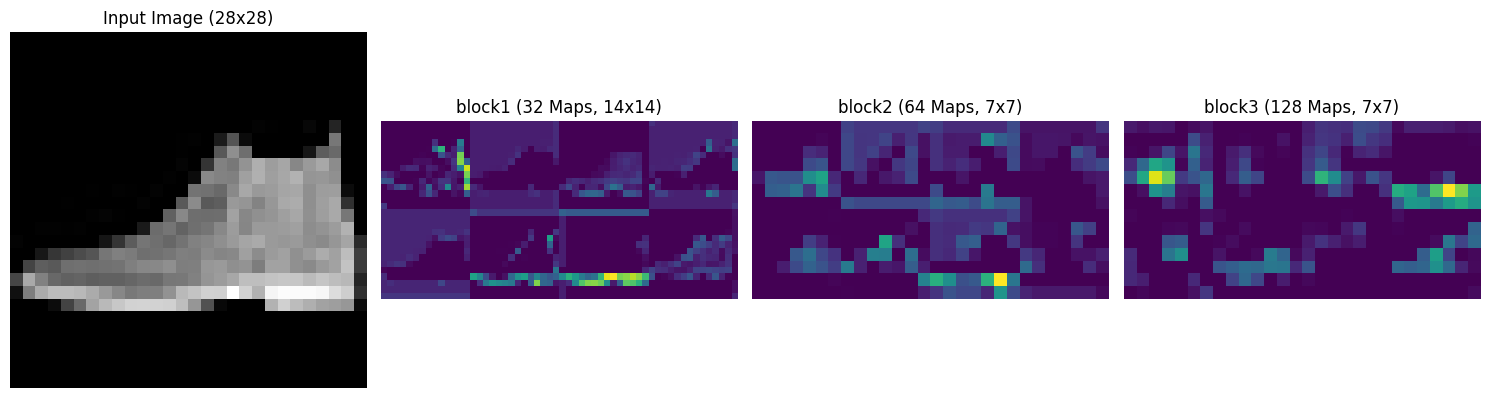


Image 2 (True Class: 2)


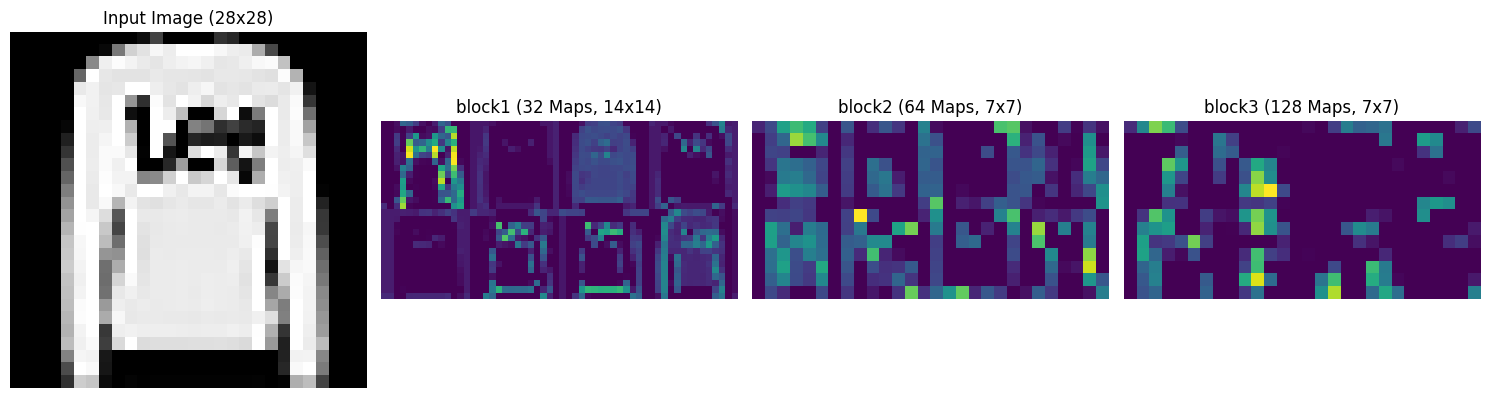


Image 3 (True Class: 1)


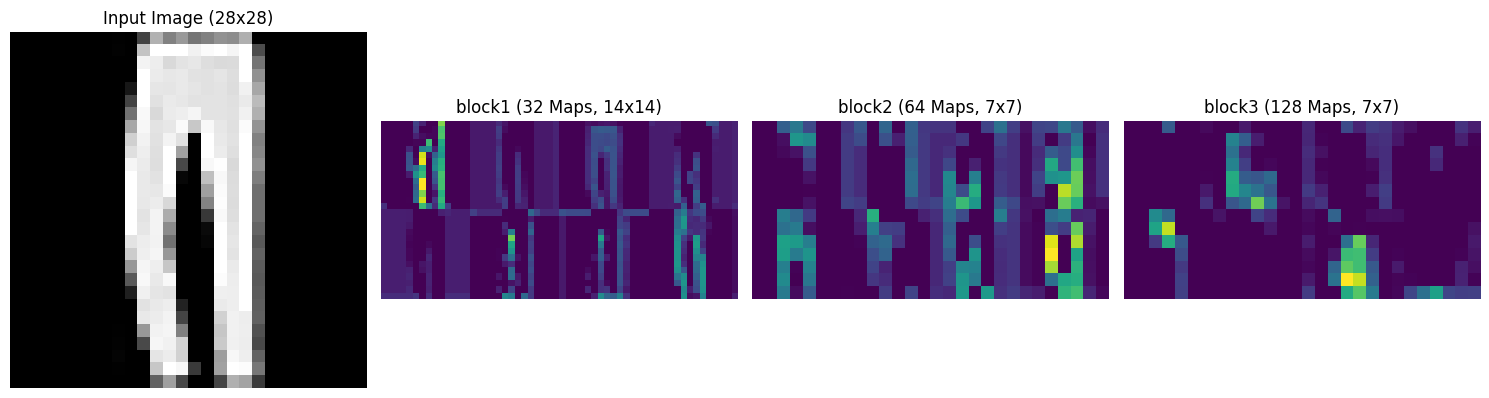

In [ ]:
#1. Register hooks
model.register_hooks() 
    
# 2. Visualize
visualize_feature_maps(model, test_loader, num_images=3, num_maps_to_show=8)

### Interpretation (7.5 Marks): Describe the kinds of features captured at different layers (edges, textures, shapes, clothing regions) and how they help both classification and ink regression.

### Feature Map Visualizations and Layer
#### Analysis
#### The feature map visualizations reveal important insights about the
model's learning:
1. Early Layer Features:
* Edge detection and basic pattern recognition
* Similar across all model variants
* Independent of λ1 and λ2 settings
2. Middle Layer Features:
* More complex pattern recognition
* Task-specific feature development
* Influenced by the balance of λ1 and λ2
3. Final Layer Features:
* Highly specialized based on task weighting
* Classification-focused models show clearer class
boundaries
* Regression-focused models show more continuous feature
spaces

# Feature Map Visualizations and Layer
## Analysis
### Interpretation
* So CNN builds a hierarchical representation: early layers
learn low-level features (edges, textures), middle layers
learn more complex patterns such as parts and textures
(sleeves, collars, shoe soles), and deeper layers encode
high-level semantic concepts (garment silhouette, logos).
These shared features help both classification and regression
tasks by providing rich representations of the input images.
### Block 1 (Early Layers - 32 filters):
*  Captures Local gradients, edges, corners, simple oriented
lines (vertical/horizontal/diagonal), and abrupt intensity
changes.
* Small receptive fields(meaning they focus on fine details) +
edge-like kernels (Sobel-like)
* for classification, these features help identify basic shapes
of clothing items.
* for regression, they help capture fine texture details that
influence the "ink" value. (brightness and contrast)
* Heatmaps show bright bands at boundaries (sleeves, hem).
Contour plots yield tightly packed contours at edges. 3D
surfaces have sharp, narrow peaks.
### Block 2 (Mid Layers - 64 filters):
* Combinations of edges into textures and parts(sleeves,
collars, shoe soles).
* Larger receptive fields allow capturing more context.
* Larger receptive fields and depth allow combining primitive
features.
* for classification, these features help recognize clothing
parts and patterns.
* for regression, they Aggregates local intensity patterns
across regions eg a dark logo on a shirt.
* Heatmaps blur edge responses into blobs covering parts;
contour plots show larger closed contours; 3D surfaces are
smoother plateaus.
### Block 3 (Deep Layers - 128 filters):
* Highly abstract, class-specific features (complete
silhouettes, distinctive motifs or logos, whole shoe
outline). Representations are sparse and discriminative.
* Large receptive field + hierarchical abstraction; filters
specialize to class-level patterns.
* for classification, these features directly map to clothing
categories.
* for ink regression, they capture overall brightness patterns
of entire garments.
* Sparse activations aligned with semantic parts; contour plots
show broad, low-frequency regions; 3D surfaces show few high
peaks.

##  What Features Each Layer Captures

### **Block 1 — Low-Level Features (32 maps, 14×14)**

* Detects **edges**, **boundaries**, **corners**, and **simple textures**
* Feature maps show clear outlines of:

  * Shoe sole edges (Image 1)
  * Sleeve edges and logo contours (Image 2)
  * Trousers silhouette lines (Image 3)

 **Why useful**

* Classification: Ensures the network understands basic structure — e.g., pants vs shirts differ in vertical vs horizontal edges.
* Ink regression: Edge density often correlates with **print coverage areas** (more edges → more ink needed for fine details like logos).

---

### **Block 2 — Mid-Level Features (64 maps, 7×7)**

* Starts grouping edges into **patterns and shapes**
* Recognizes local object parts:

  * Shoe heel vs toe areas
  * Hoodie pocket / logo region
  * Pants leg separation

 **Why useful**

* Classification: Distinguishes clothing types via characteristic **parts**

  * Pants → long vertical structure
  * Hoodie → torso + sleeves
  * Shoe → curved shape at bottom
* Ink regression: Captures **texture richness** and **local shading** → helps estimate **how much ink is printed in each region**.

---

### **Block 3 — High-Level Semantic Features (128 maps, 7×7)**

* Highlights **meaningful clothing regions**

  * Shoe top & heel details (sole thickness)
  * High-contrast printed logo on hoodie
  * Pant pockets / crease regions

→ These are no longer “edges” — they’re **concepts** like “sleeve”, “sole”, “text region”.

 **Why useful**

* Classification: Confidently separates classes from **semantic cues**
  (A printed logo → sweatshirt class, not pants)
* Ink regression:

  * Activation hotspots match **dark/ink-heavy zones**
  * Logo on hoodie is very bright in block3 heatmaps → high ink

---

##  How These Learned Features Support **Both Tasks**

| Feature Level | What it Represents                 | Helps Classification By…            | Helps Ink Regression By…                  |
| ------------- | ---------------------------------- | ----------------------------------- | ----------------------------------------- |
| Low Level     | Edges, simple textures             | Learning overall shape outlines     | Measuring complexity of printing contours |
| Mid Level     | Clothing parts                     | Recognizing sleeves, pockets, soles | Estimating ink distribution on parts      |
| High Level    | Semantic regions (logo/text/brand) | Distinguishing clothing categories  | Identifying **ink concentration zones**   |

 When training jointly, the higher feature layers must learn:

> **Where ink-heavy regions overlap with discriminative areas**
> (e.g., the hoodie logo is important for both class + ink)


